In [1]:
import numpy as np
from scipy.io import loadmat
dataset1 = loadmat('dataset1-small.mat')
print(dataset1)
dataset1_processed = np.array(dataset1['f0'])
#sample rate in hz
sr = int(dataset1['samplerate'][0].replace(' Hz', ''))

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Nov 15 10:39:00 2007', '__version__': '1.0', '__globals__': [], 'f0': array([[ 0.00465658],
       [ 0.00627838],
       [-0.00215498],
       ...,
       [ 0.00400786],
       [ 0.00173734],
       [ 0.0053053 ]]), 'dataset': array(['Simulated small tremor'], dtype='<U22'), 'samplerate': array(['500 Hz'], dtype='<U6'), 'info': array(['This is simulated data that has been adjusted for the structure in the South Wing lab'],
      dtype='<U85')}


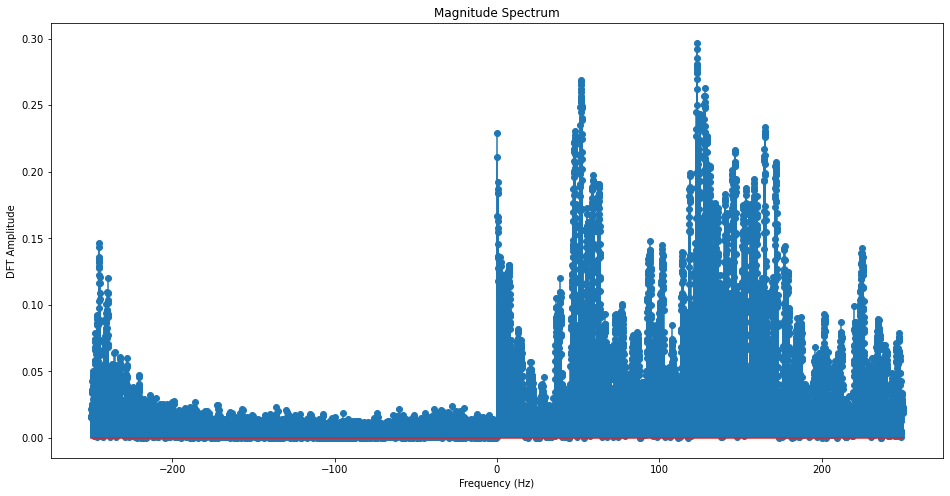

In [9]:
from Fourier import DiscreteFourierTransform

# the data set now is killing the kernel because it is too large 
dataset1_transform = DiscreteFourierTransform(dataset1_processed[0:sampling_range], sr)
dataset1_transform.DFT()
dataset1_transform.DFTplot()

In [3]:
sampling_range= 10000

10000
10000
[14.39196471+0.j         -2.88319824-4.7801946j  -7.4737622 +2.63553793j
 ...  2.55394518+3.82840509j -7.4737622 -2.63553793j
 -2.88319824+4.7801946j ]
10000
[ 0.    0.05  0.1  ... -0.15 -0.1  -0.05]


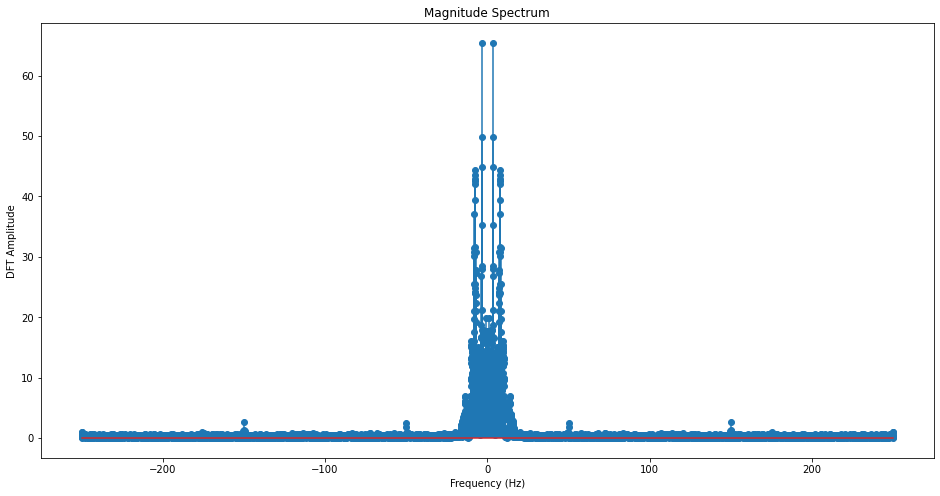

In [10]:
window_function = np.hanning(sampling_range)
print(len(window_function))
dataset1_transform.apply_window(window_function, sampling_range)

In [7]:
from scipy import signal

10000
[ 1.80229962+0.j         -2.15600563-1.47066218j -0.06370044+4.0073226j
 ...  4.74007281+4.58372539j -0.06370044-4.0073226j
 -2.15600563+1.47066218j]
10000
[ 0.    0.05  0.1  ... -0.15 -0.1  -0.05]


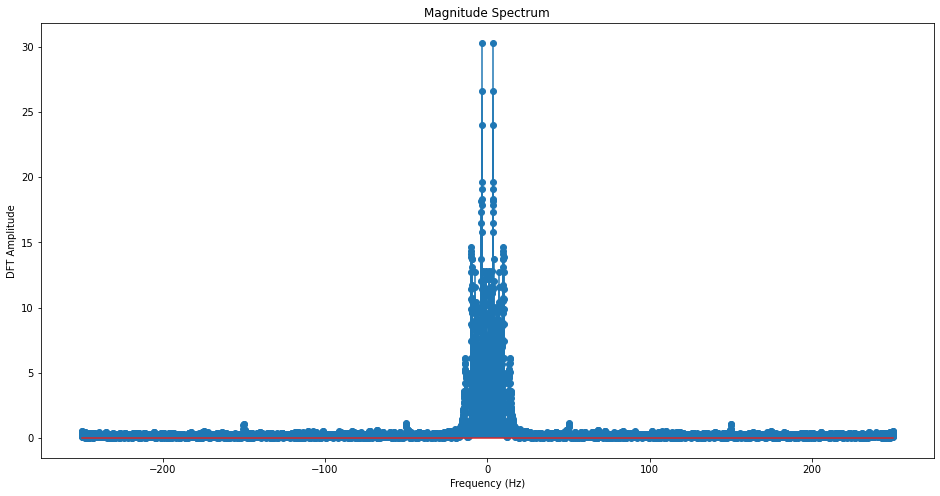

In [11]:
flattopwindow = signal.windows.flattop(sampling_range)
dataset1_transform.apply_window(flattopwindow, sampling_range)

10000
[13.91630159+0.j         -2.35923764-4.64172115j -8.55861458+2.80458328j
 ...  0.56275637+1.84037182j -8.55861458-2.80458328j
 -2.35923764+4.64172115j]
10000
[ 0.    0.05  0.1  ... -0.15 -0.1  -0.05]


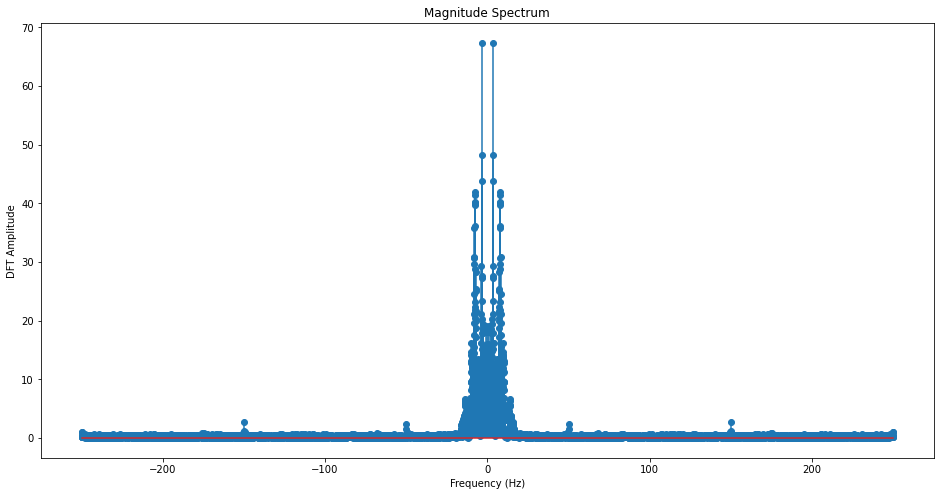

In [12]:
bartlettwindow = np.bartlett(sampling_range)
dataset1_transform.apply_window(bartlettwindow, sampling_range)

10000
[  5.49534478 +0.j         -23.29082718 -4.30838699j
 -40.54773806+10.49151055j ... -27.90895422-14.74772469j
 -40.54773806-10.49151055j -23.29082718 +4.30838699j]
10000
[ 0.    0.05  0.1  ... -0.15 -0.1  -0.05]


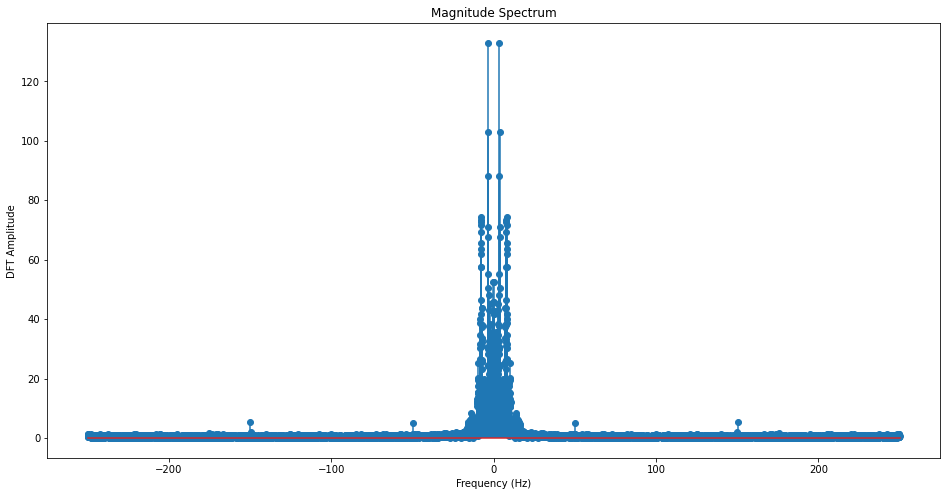

In [13]:
boxcarwindow = signal.windows.boxcar(sampling_range)
dataset1_transform.apply_window(boxcarwindow, sampling_range)

10000
[ 19.09048186+0.j          -2.79164993-6.03599751j
 -12.0449426 +2.83189613j ...  -0.87674367+0.70486295j
 -12.0449426 -2.83189613j  -2.79164993+6.03599751j]
10000
[ 0.    0.05  0.1  ... -0.15 -0.1  -0.05]


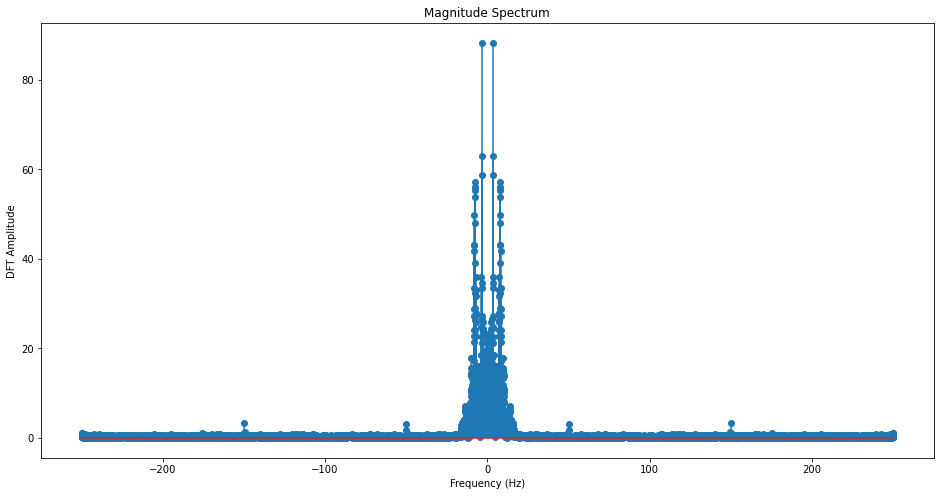

In [14]:
cosinewindow = signal.windows.cosine(sampling_range)
dataset1_transform.apply_window(cosinewindow, sampling_range)